In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import warnings
import seaborn as sb
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import linregress
import requests

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
# Load datasets
healthcare_population_raw = "Data_Files_Healthcare_Project/healthcare_population_raw_data.csv"
raw_data = "Data_Files_Healthcare_Project/raw_data.csv"
insurance_coverage_rates = "Data_Files_Healthcare_Project/Coverage Rates of Health Insurance Types By States.xlsx"

paths = [
    "Data_Files_Healthcare_Project/healthcare_population_raw_data.csv",
    "Data_Files_Healthcare_Project/raw_data.csv",
    "Data_Files_Healthcare_Project/Coverage Rates of Health Insurance Types By States.csv"]

In [3]:
# Create DataFrames
healthcare_population_raw = pd.read_csv('Data_Files_Healthcare_Project/healthcare_population_raw_data.csv')
raw_data = pd.read_csv('Data_Files_Healthcare_Project/raw_data.csv')
insurance_coverage_rates = pd.read_excel('Data_Files_Healthcare_Project/Coverage Rates of Health Insurance Types By States.xlsx')

In [4]:
# Display the first few rows of each dataset
print("Healthcare Population Raw Sample:\n", healthcare_population_raw.head())
print("\nRaw Data Sample:\n", raw_data.head())
print("/Insurance Coverage Rates Sample:\n", insurance_coverage_rates.head())

Healthcare Population Raw Sample:
   Title: Health Care Expenditures by State of Residence (in millions) | KFF  \
0                                                NaN                          
1                                                NaN                          
2                                                NaN                          
3                                                NaN                          
4                                                NaN                          

   Unnamed: 1  Unnamed: 2      Unnamed: 3       Unnamed: 4  \
0         NaN         NaN  State Pop 2020  Timeframe: 2020   
1         NaN         NaN             NaN         Location   
2         NaN         NaN     331,526,933    United States   
3         NaN         NaN       5,031,864          Alabama   
4         NaN         NaN         732,964           Alaska   

              Unnamed: 5      Unnamed: 6       Unnamed: 7  \
0                    NaN  State Pop 2019  Timeframe: 201

In [5]:
# Data Cleaning of raw_data
#Load data
file_path = "Data_Files_Healthcare_Project/raw_data.csv"
raw_data = pd.read_csv(file_path, header=None)

# Step 1 Remove metadata rows
raw_data = raw_data.iloc[2:]

#raw_data

# Drop columns by index
raw_data = raw_data.drop(columns=[2, 11, 14])

raw_data = raw_data.iloc[:53]

#Display modified DataFrame
print(raw_data.tail(52))

                      0            1                     3            4   \
3          United States  $3,357,832          United States  $3,175,230    
4                Alabama     $45,673                Alabama     $42,903    
5                 Alaska      $9,975                 Alaska      $9,702    
6                Arizona     $64,980                Arizona     $59,392    
7               Arkansas     $28,300               Arkansas     $26,744    
8             California    $405,451             California    $379,715    
9               Colorado     $49,849               Colorado     $47,715    
10           Connecticut     $44,425            Connecticut     $42,190    
11              Delaware     $12,729               Delaware     $11,928    
12  District of Columbia     $10,251   District of Columbia      $9,869    
13               Florida    $214,408                Florida    $203,957    
14               Georgia     $93,803                Georgia     $87,607    
15          

In [6]:
# Step 2: Set appropriate column names
years = range(2020, 2009, -1) # Adjust range based on the number of years
columns = []

print (years)

range(2020, 2009, -1)


In [7]:
print("Value of years:", years)
print("Type of years:", type(years))

Value of years: range(2020, 2009, -1)
Type of years: <class 'range'>


In [8]:
for year in years:
    columns.extend([f'Location_{year}', f'Total Health Spending_{year}'])

if len(columns) == raw_data.shape[1]:
    raw_data.columns = columns
else:
    print("Error: Mismatch in column count.")

In [9]:
# Step 3: Reshape the data by unpivoting each year into rows
data_cleaned = pd.DataFrame()

In [10]:
for year in years:
    # Select location and spending columns for the specific year
    year_data = raw_data[[f'Location_{year}', f'Total Health Spending_{year}']].copy()
    year_data.columns = ['State', 'Total Health Spending']
    year_data['Year'] = year
    data_cleaned = pd.concat([data_cleaned, year_data])

In [11]:
# Step 4: Remove any rows where 'State is Nan (in case of any empty rows from combining data)
data_cleaned = data_cleaned.dropna(subset=['State'])

In [12]:
# Cleaning data
data_cleaned = data_cleaned[data_cleaned['State'] != "Location"]
data_cleaned = data_cleaned[data_cleaned['State'] != "United Stated"]

In [13]:
# Step 5: Convert 'Total Health Spending' to numeric by removing any non-numeric characters
data_cleaned['Total Health Spending'] = data_cleaned['Total Health Spending'].replace('[\$]', '', regex=True)

In [14]:
# Reset the index
data_cleaned.reset_index(drop=True, inplace=True)

In [15]:
# Display the cleaned data
print(data_cleaned.head(10))
data_cleaned.to_csv('raw_data_cleaned.csv')

raw_data_cleaned = data_cleaned

                  State Total Health Spending  Year
0         United States            3,357,832   2020
1               Alabama               45,673   2020
2                Alaska                9,975   2020
3               Arizona               64,980   2020
4              Arkansas               28,300   2020
5            California              405,451   2020
6              Colorado               49,849   2020
7           Connecticut               44,425   2020
8              Delaware               12,729   2020
9  District of Columbia               10,251   2020


In [16]:
# Data Cleaning of healthcare_population_raw_data

In [17]:
# Load the data 
file_path = 'Data_Files_Healthcare_Project/healthcare_population_raw_data.csv'
healthcare_population_raw_data = pd.read_csv(file_path, header=None)

# Step 1: Remove metadata rows
healthcare_population_raw_data = healthcare_population_raw_data.iloc[2:]

#raw_data

# Drop columns by index
healthcare_population_raw_data = healthcare_population_raw_data.drop(columns=[0, 1, 2])

#healthcare_population_raw = healthcare_population_raw.iloc[:53]


# Display the modified DataFrame
print(healthcare_population_raw_data.head(5))

            3              4                      5            6   \
2          NaN       Location  Total Health Spending          NaN   
3  331,526,933  United States            $3,357,832   328,239,523   
4    5,031,864        Alabama               $45,673     4,903,185   
5      732,964         Alaska                $9,975       731,545   
6    7,186,683        Arizona               $64,980     7,278,717   

              7                      8            9              10  \
2       Location  Total Health Spending          NaN       Location   
3  United States            $3,175,230   326,687,501  United States   
4        Alabama               $42,903     4,887,681        Alabama   
5         Alaska                $9,702       735,139         Alaska   
6        Arizona               $59,392     7,158,024        Arizona   

                      11           12  ...                     23  \
2  Total Health Spending          NaN  ...  Total Health Spending   
3            $3,021,

In [18]:
# Step 2: Set appropriate column names
# Assuming the columns are organized as: Location, Spending for each year, starting from 2020 and moving backwards
years = range(2020, 2010, -1)  # Adjust range based on the number of years in the file
columns = []

print(years)

range(2020, 2010, -1)


In [19]:
for year in years:
    columns.extend([f'Pop_{year}',f'Location_{year}', f'Total Health Spending_{year}'])

healthcare_population_raw_data.columns = columns

In [20]:
healthcare_population_raw_data

,Pop_2020,Location_2020,Total Health Spending_2020,Pop_2019,Location_2019,Total Health Spending_2019,Pop_2018,Location_2018,Total Health Spending_2018,Pop_2017,...,Total Health Spending_2014,Pop_2013,Location_2013,Total Health Spending_2013,Pop_2012,Location_2012,Total Health Spending_2012,Pop_2011,Location_2011,Total Health Spending_2011
2,NaN,Location,Total Health Spending,NaN,Location,Total Health Spending,NaN,Location,Total Health Spending,NaN,...,Total Health Spending,NaN,Location,Total Health Spending,NaN,Location,Total Health Spending,NaN,Location,Total Health Spending
3,"331,526,933",United States,"$3,357,832","328,239,523",United States,"$3,175,230","326,687,501",United States,"$3,021,796","324,985,539",...,"$2,527,325","315,993,715",United States,"$2,405,667","313,830,990",United States,"$2,346,962","311,556,874",United States,"$2,254,675"
4,"5,031,864",Alabama,"$45,673","4,903,185",Alabama,"$42,903","4,887,681",Alabama,"$40,810","4,874,486",...,"$35,248","4,830,081",Alabama,"$33,670","4,815,588",Alabama,"$32,740","4,799,069",Alabama,"$31,262"
5,"732,964",Alaska,"$9,975","731,545",Alaska,"$9,702","735,139",Alaska,"$9,352","739,700",...,"$7,765","737,068",Alaska,"$7,439","730,443",Alaska,"$7,257","722,128",Alaska,"$6,749"
6,"7,186,683",Arizona,"$64,980","7,278,717",Arizona,"$59,392","7,158,024",Arizona,"$55,997","7,044,008",...,"$44,177","6,632,764",Arizona,"$41,728","6,554,978",Arizona,"$40,692","6,472,643",Arizona,"$39,329"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Step 3: Reshape the data by organizing each year into rows
data_cleaned = pd.DataFrame()

In [22]:
for year in years:
    # Select location and spending columns for the specific year
    year_data = healthcare_population_raw_data[[f'Pop_{year}',f'Location_{year}', f'Total Health Spending_{year}']].copy()
    year_data.columns = ['Pop','State', 'Total Health Spending']
    year_data['Year'] = year
    data_cleaned = pd.concat([data_cleaned, year_data])

In [23]:
# Step 4: Remove any rows where 'State' is NaN (in case of any empty rows from combining)
data_cleaned = data_cleaned.dropna(subset=['State'])

In [24]:
# Cleaning Data
data_cleaned = data_cleaned[data_cleaned['State'] != "Location"] 
data_cleaned = data_cleaned[data_cleaned['State'] != "United States"] 

In [25]:
# Step 5: Convert 'Total Health Spending' to numeric by removing any non-numeric characters
data_cleaned['Total Health Spending'] = data_cleaned['Total Health Spending'].str.replace('$', '')
# Step 5: Convert 'Total Health Spending' to numeric by removing any non-numeric characters
data_cleaned['Total Health Spending'] = data_cleaned['Total Health Spending'].str.replace(',', '').astype(float)

In [26]:
# Data Cleaning
data_cleaned['Pop'] = data_cleaned['Pop'].str.replace(',', '').astype(float)

In [27]:
# Display the cleaned data
print(data_cleaned.head(10))
data_cleaned.to_csv('healthcare_population_raw_data_cleaned.csv')

healthcare_population_raw_data_cleaned = data_cleaned

           Pop                 State  Total Health Spending  Year
4    5031864.0               Alabama                45673.0  2020
5     732964.0                Alaska                 9975.0  2020
6    7186683.0               Arizona                64980.0  2020
7    3014348.0              Arkansas                28300.0  2020
8   39503200.0            California               405451.0  2020
9    5785219.0              Colorado                49849.0  2020
10   3577586.0           Connecticut                44425.0  2020
11    991862.0              Delaware                12729.0  2020
12    670839.0  District of Columbia                10251.0  2020
13  21591299.0               Florida               214408.0  2020


In [28]:
## Data Cleaning of Coverage Data

In [29]:
# Load the data 
file_path = 'Data_Files_Healthcare_Project/Coverage Rates of Health Insurance Types By States.xlsx'
insurance_coverage_rates = pd.read_excel(file_path, skiprows=3)

# Step 1: Remove metadata rows 
insurance_coverage_rates = insurance_coverage_rates.iloc[1:]

#raw_data

# Drop columns by index
#healthcare_population_raw = healthcare_population_raw.drop(columns=[0, 1, 2])

insurance_coverage_rates = insurance_coverage_rates.iloc[:572]


# Display the modified DataFrame
print(insurance_coverage_rates.head(10))

#insurance_coverage_rates.to_csv('ff.csv')
#insurance_coverage_rates.columns

     Nation/State           Coverage    2023 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
1   United States              Total  330000         20        100          0   
2   United States       Any coverage  303800        180       92.1        0.1   
3   United States          Uninsured   26170        183        7.9        0.1   
4   United States            Private  221100        455         67        0.1   
5   United States   ..Employer-based  180400        418       54.7        0.1   
6   United States  ..Direct-purchase   45770        149       13.9          Z   
7   United States          ..TRICARE    9088         82        2.8          Z   
8   United States             Public  123500        279       37.4        0.1   
9   United States         ..Medicaid   70330        316       21.3        0.1   
10  United States         ..Medicare   61900         66       18.8          Z   

      2022 Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Unnamed: 56 Unnamed: 57  \
1   328300         17        100

In [30]:
# Define the years and suffixes for renaming
years = range(2023, 2007, -1)
suffixes = ['estimate', 'MOError1', 'Percent', 'MOError2']

# Start column index based on your data structure (D is index 3)
start_index = 2

# Loop over years and suffixes to rename columns
for year in years:
    for i, suffix in enumerate(suffixes):
        if start_index + i < len(insurance_coverage_rates.columns):
            insurance_coverage_rates.columns.values[start_index + i] = f'{year}_{suffix}'
    start_index += len(suffixes)  # Move to the next set of columns for the next year

# Verify the column names
print(insurance_coverage_rates.columns)

Index(['Nation/State', 'Coverage', '2023_estimate', '2023_MOError1',
       '2023_Percent', '2023_MOError2', '2022_estimate', '2022_MOError1',
       '2022_Percent', '2022_MOError2', '2021_estimate', '2021_MOError1',
       '2021_Percent', '2021_MOError2', '2020_estimate', '2020_MOError1',
       '2020_Percent', '2020_MOError2', '2019_estimate', '2019_MOError1',
       '2019_Percent', '2019_MOError2', '2018_estimate', '2018_MOError1',
       '2018_Percent', '2018_MOError2', '2017_estimate', '2017_MOError1',
       '2017_Percent', '2017_MOError2', '2016_estimate', '2016_MOError1',
       '2016_Percent', '2016_MOError2', '2015_estimate', '2015_MOError1',
       '2015_Percent', '2015_MOError2', '2014_estimate', '2014_MOError1',
       '2014_Percent', '2014_MOError2', '2013_estimate', '2013_MOError1',
       '2013_Percent', '2013_MOError2', '2012_estimate', '2012_MOError1',
       '2012_Percent', '2012_MOError2', '2011_estimate', '2011_MOError1',
       '2011_Percent', '2011_MOError2', '20

In [31]:
# Melt DataFrame to organize year and metric columns into rows
melted_df = insurance_coverage_rates.melt(
    id_vars=['Nation/State', 'Coverage'],  # Keep these columns as identifiers
    var_name='Metric',  # New column for the combined Year and Metric
    value_name='Value'  # New column for the values
)

# Rename columns to match the desired output
melted_df = melted_df.rename(columns={
    'Nation/State': 'Nation',
    'Coverage': 'Coverage'
})

# Reorder columns to match desired output format
melted_df = melted_df[['Nation', 'Coverage', 'Metric', 'Value']]

# Display the transformed DataFrame
print(melted_df.head())

          Nation          Coverage         Metric   Value
0  United States             Total  2023_estimate  330000
1  United States      Any coverage  2023_estimate  303800
2  United States         Uninsured  2023_estimate   26170
3  United States           Private  2023_estimate  221100
4  United States  ..Employer-based  2023_estimate  180400


In [32]:
# Remove leading '..' from the Coverage column
melted_df['Coverage'] = melted_df['Coverage'].str.replace('.. ', '')
melted_df['Coverage'] = melted_df['Coverage'].str.replace('..', '')
melted_df = melted_df[melted_df['Nation'] != "United States"] 

# Display the updated DataFrame
print(melted_df[['Coverage']].head())

          Coverage
11           Total
12    Any coverage
13       Uninsured
14         Private
15  Employer-based


In [33]:
print(melted_df.head())

     Nation        Coverage         Metric Value
11  Alabama           Total  2023_estimate  5022
12  Alabama    Any coverage  2023_estimate  4596
13  Alabama       Uninsured  2023_estimate   426
14  Alabama         Private  2023_estimate  3368
15  Alabama  Employer-based  2023_estimate  2694


In [34]:
# Ensure the Metric column is treated as strings
melted_df['Metric'] = melted_df['Metric'].astype(str)

# Split the Metric column into Year and Metric
melted_df[['Year', 'Metric']] = melted_df['Metric'].str.split('_', expand=True)

# Reorder columns to match the desired format
#melted_df = melted_df[['Nation', 'Coverage', 'Metric', 'Value', 'Year']]

# Display the updated DataFrame
print(melted_df.head())

     Nation        Coverage    Metric Value  Year
11  Alabama           Total  estimate  5022  2023
12  Alabama    Any coverage  estimate  4596  2023
13  Alabama       Uninsured  estimate   426  2023
14  Alabama         Private  estimate  3368  2023
15  Alabama  Employer-based  estimate  2694  2023


In [35]:
melted_df.to_csv('insurance_coverage_rates_cleaned.csv')
insurance_coverage_rates_cleaned = melted_df

In [36]:
## Analysis

In [37]:
# Load the cleaned datasets
population_data = pd.read_csv('healthcare_population_raw_data_cleaned.csv')
insurance_data = pd.read_csv('insurance_coverage_rates_cleaned.csv')
expenditure_data = pd.read_csv('raw_data_cleaned.csv')

In [38]:
## How has the proportion of insured versus uninsured people changed yearly across states from 2011 to 2020?

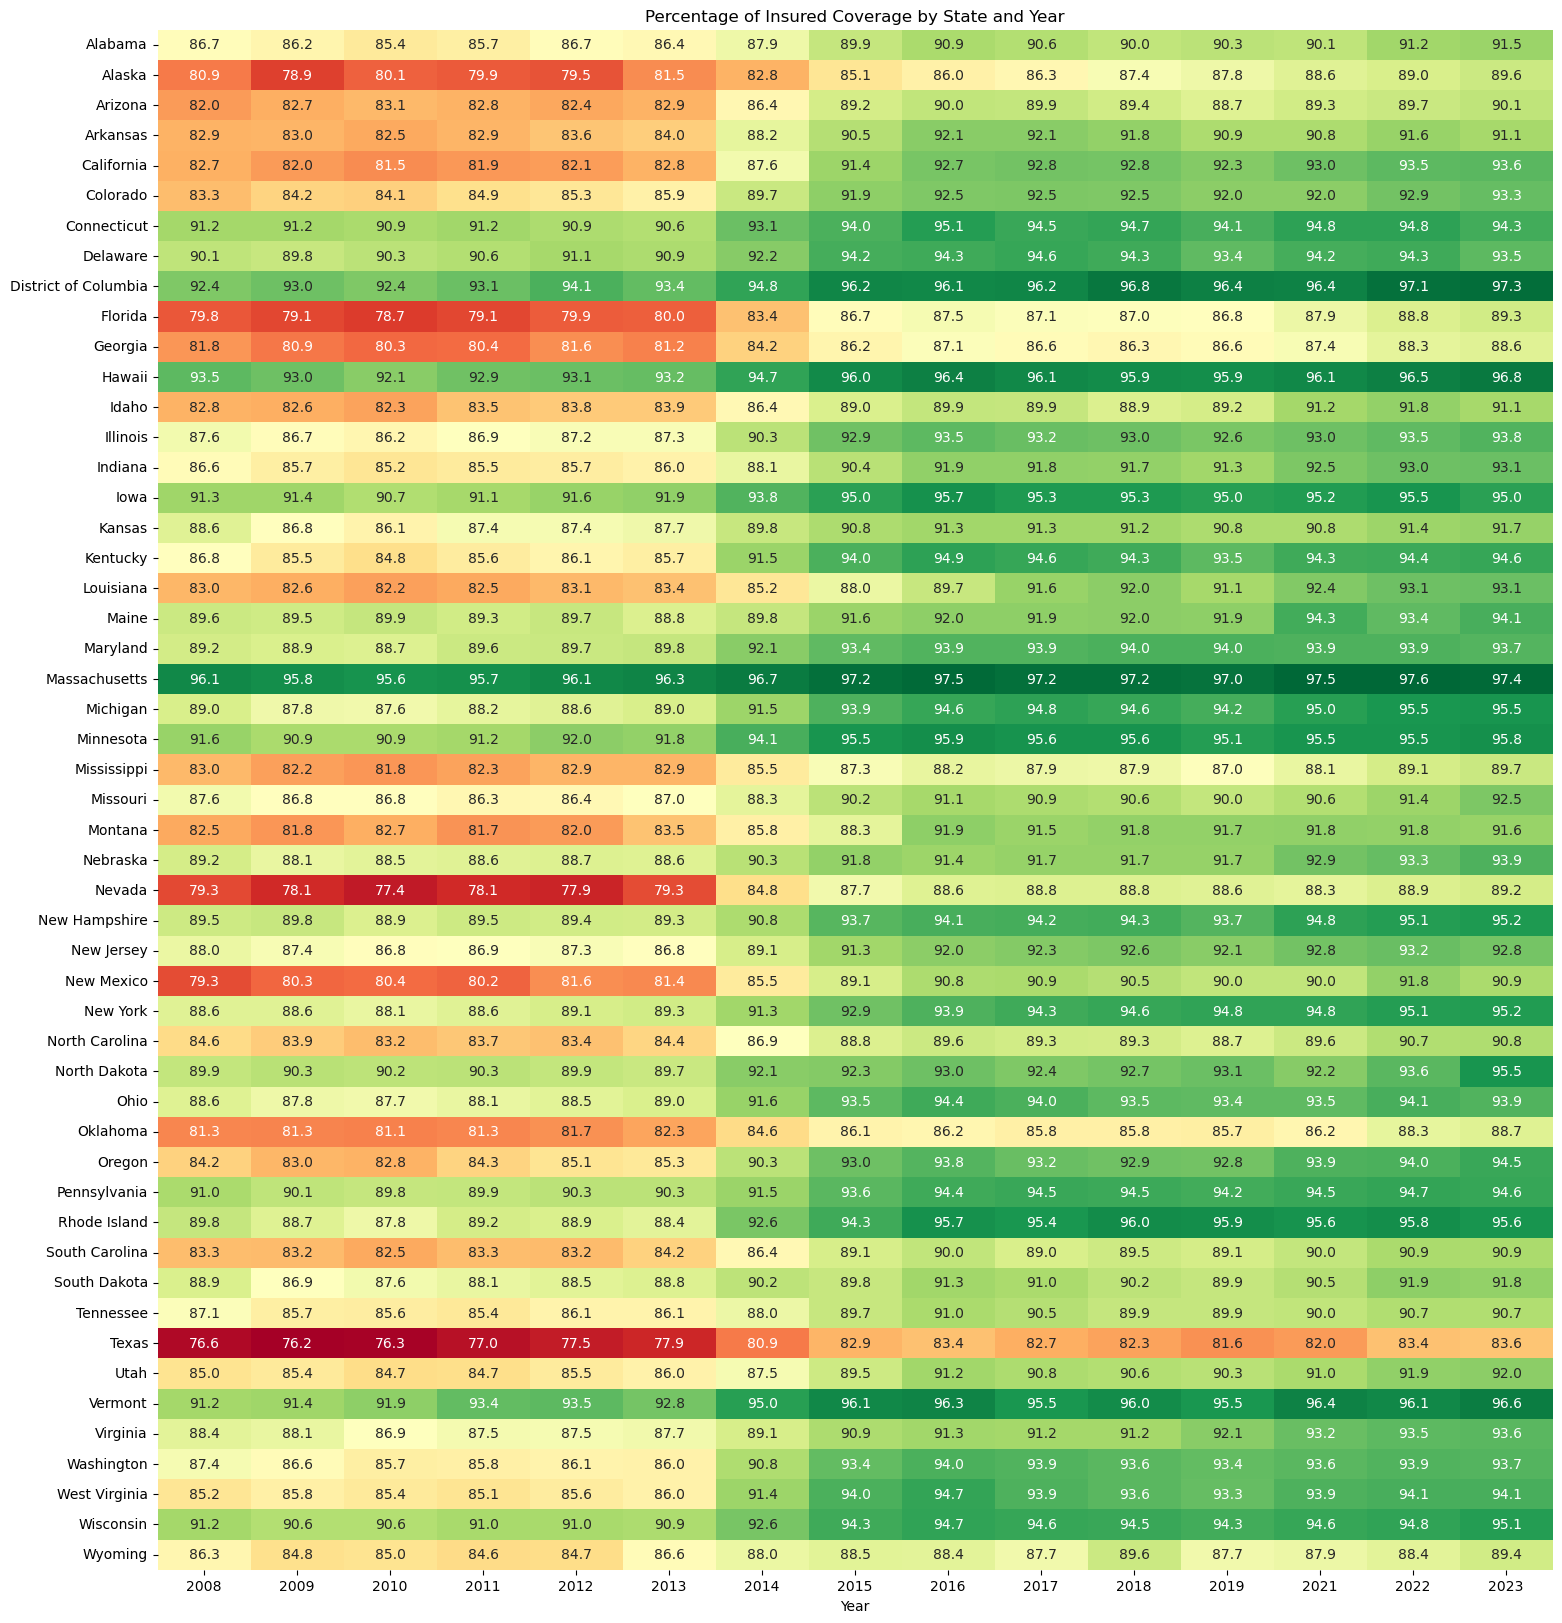

In [39]:
#Load Data
df = insurance_data
df = df[df['Year'] != 2020] 
df = df[df['Metric'] != 'Percent'] 
df = df[df['Metric'] != 'MOError1'] 
df = df[df['Metric'] != 'MOError2'] 

# Filter data to get rows where `Coverage` is "Any coverage" or "Total"
coverage_data = df[df['Coverage'].isin(['Any coverage', 'Uninsured'])]

coverage_data['Value'] =coverage_data['Value'].str.replace(',', '')
coverage_data['Value'] =coverage_data['Value'].astype(float)

# Pivot the table to have "Any coverage" and "Total" as columns for each state and year
coverage_pivot = coverage_data.pivot_table(
    index=['Nation', 'Year'],
    columns='Coverage',
    values='Value'
).reset_index()

# Calculate the percentage of insured people (Any coverage / Total * 100)
coverage_pivot['Percent Insured'] = (coverage_pivot['Any coverage'] / (coverage_pivot['Uninsured']+coverage_pivot['Any coverage'] ) )* 100

# Display the results
#print(coverage_pivot[['Nation', 'Year', 'Percent Insured']].head())

# Optionally, save the results to a new CSV file
coverage_pivot[['Nation', 'Year', 'Percent Insured']].to_csv('percent_insured_by_state_year.csv', index=False)


# Correcting the pivot statement
heatmap_data = coverage_pivot.pivot(index='Nation', columns='Year', values='Percent Insured')

# Plot the heatmap
plt.figure(figsize=(18, 20))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="RdYlGn", cbar_kws={'label': 'Percent Insured'}, cbar=False)
plt.title('Percentage of Insured Coverage by State and Year')
plt.xlabel('Year')
plt.ylabel('')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

In [40]:
# What are the trends in healthcare insurance rates from 2011 to 2020, and how do they vary by state?

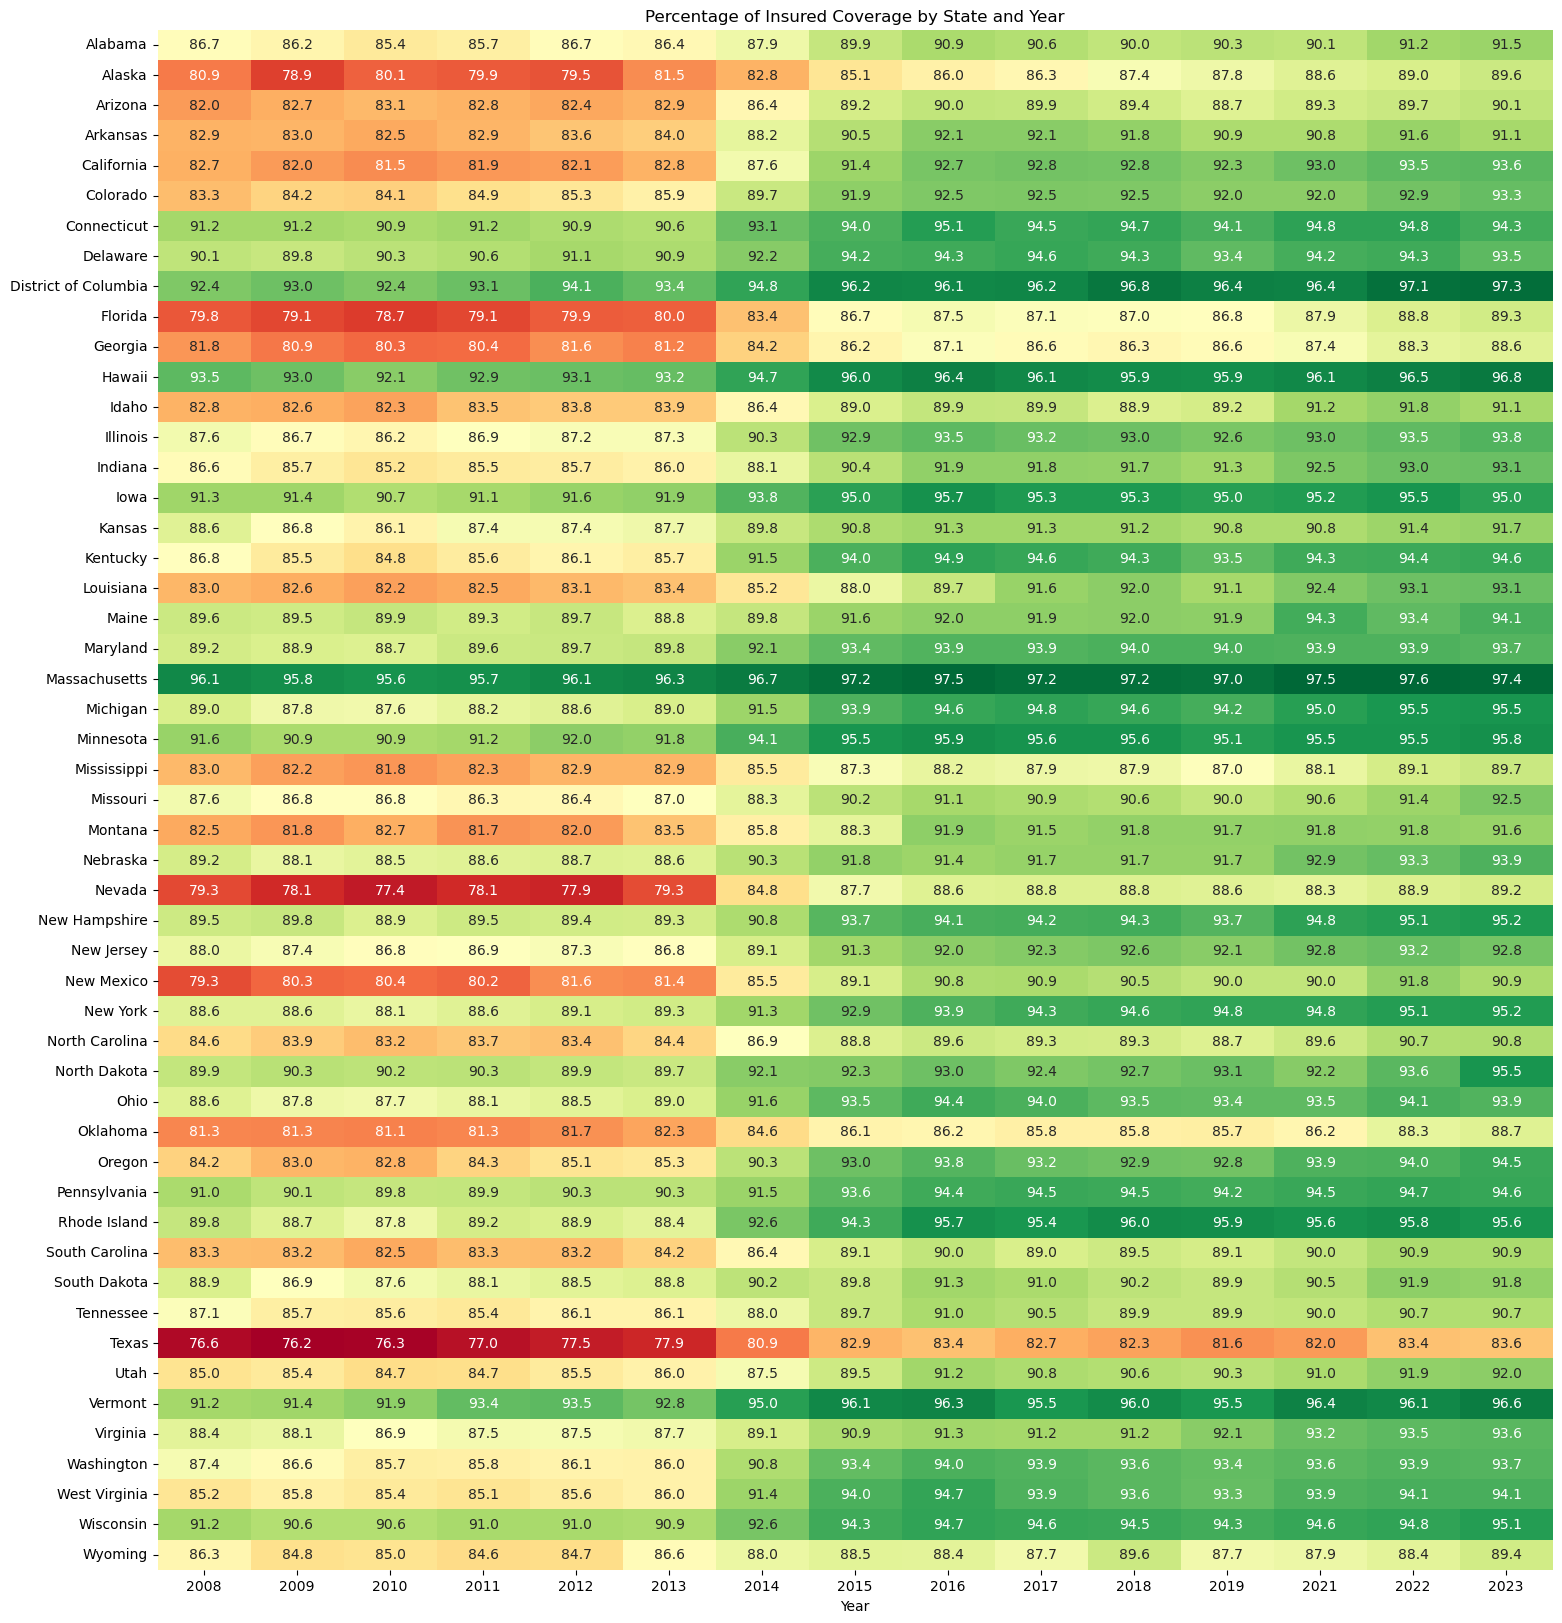

In [41]:
#Load Data
df = insurance_data
df = df[df['Year'] != 2020] 
df = df[df['Metric'] != 'Percent'] 
df = df[df['Metric'] != 'MOError1'] 
df = df[df['Metric'] != 'MOError2'] 

# Filter data to get rows where `Coverage` is "Any coverage" or "Total"
coverage_data = df[df['Coverage'].isin(['Any coverage', 'Uninsured'])]

coverage_data['Value'] =coverage_data['Value'].str.replace(',', '')
coverage_data['Value'] =coverage_data['Value'].astype(float)

# Pivot the table to have "Any coverage" and "Total" as columns for each state and year
coverage_pivot = coverage_data.pivot_table(
    index=['Nation', 'Year'],
    columns='Coverage',
    values='Value'
).reset_index()

# Calculate the percentage of insured people (Any coverage / Total * 100)
coverage_pivot['Percent Insured'] = (coverage_pivot['Any coverage'] / (coverage_pivot['Uninsured']+coverage_pivot['Any coverage'] ) )* 100

# Display the results
#print(coverage_pivot[['Nation', 'Year', 'Percent Insured']].head())

# Optionally, save the results to a new CSV file
coverage_pivot[['Nation', 'Year', 'Percent Insured']].to_csv('percent_insured_by_state_year.csv', index=False)


# Correcting the pivot statement
heatmap_data = coverage_pivot.pivot(index='Nation', columns='Year', values='Percent Insured')

# Plot the heatmap
plt.figure(figsize=(18, 20))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="RdYlGn", cbar_kws={'label': 'Percent Insured'}, cbar=False)
plt.title('Percentage of Insured Coverage by State and Year')
plt.xlabel('Year')
plt.ylabel('')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

In [42]:
## What are the trends in private insurance enrollment by state from 2011 to 2020?

Coverage  Year      Private
0         2008  4074.490196
1         2009  3986.490196
2         2010  3926.941176
3         2011  3918.960784
4         2012  3945.333333
5         2013  3968.470588
6         2014  4085.000000
7         2015  4186.803922
8         2016  4232.470588
9         2017  4253.980392
10        2018  4267.254902
11        2019  4270.784314
12        2021  4295.490196
13        2022  4326.627451
14        2023  4335.960784


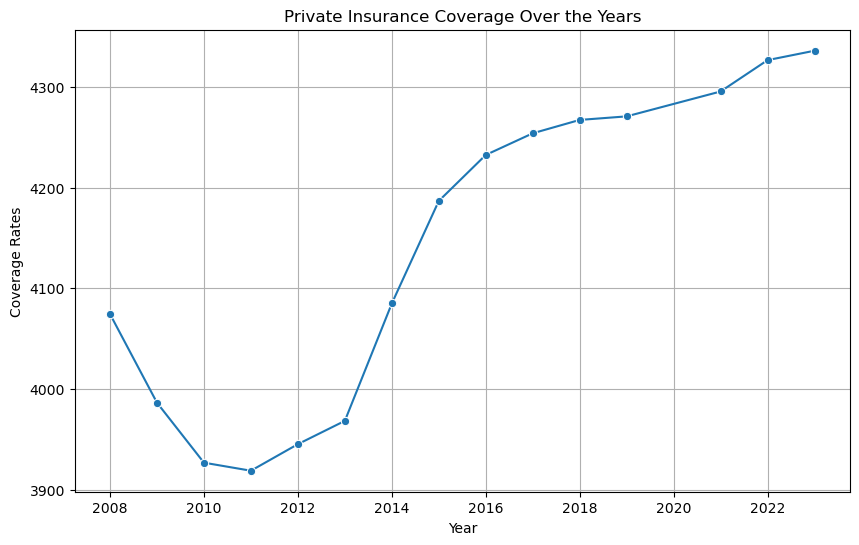

In [43]:
#Load Data
df = insurance_data
df = df[df['Year'] != 2020] 
df = df[df['Metric'] != 'Percent'] 
df = df[df['Metric'] != 'MOError1'] 
df = df[df['Metric'] != 'MOError2'] 

# Filter data to get rows where `Coverage` is "Any coverage" or "Total"
coverage_data = df[df['Coverage'].isin(['Private'])]

coverage_data['Value'] =coverage_data['Value'].str.replace(',', '')
coverage_data['Value'] =coverage_data['Value'].astype(float)

# Pivot the table to have "Any coverage" and "Total" as columns for each state and year
coverage_pivot = coverage_data.pivot_table(
    index=['Year'],
    columns='Coverage',
    values='Value'
).reset_index()

# Calculate the percentage of insured people (Any coverage / Total * 100)
#coverage_pivot['Percent Insured'] = (coverage_pivot['Any coverage'] / (coverage_pivot['Uninsured']+coverage_pivot['Any coverage'] ) )* 100

# Display the results
#print(coverage_pivot[['Nation', 'Year', 'Percent Insured']].head())

# Optionally, save the results to a new CSV file
#coverage_pivot[['Nation', 'Year', 'Percent Insured']].to_csv('percent_insured_by_state_year.csv', index=False)

print(coverage_pivot)


# Plotting the line chart for "Private" insurance coverage over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=coverage_pivot, x='Year', y='Private', marker='o')

# Add labels and title
plt.title('Private Insurance Coverage Over the Years')
plt.xlabel('Year')
plt.ylabel('Coverage Rates')
plt.grid(True)
plt.show()

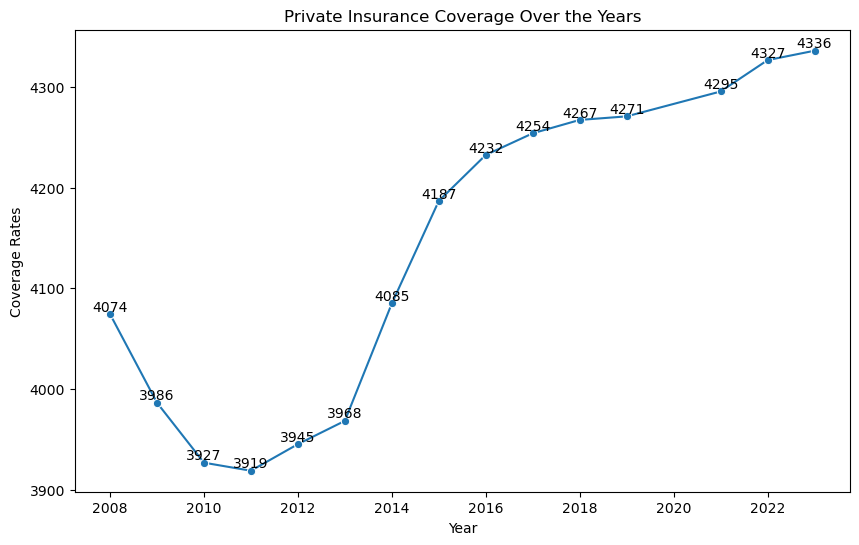

In [44]:
# Filter only relevant coverage types 
#insurance_data = insurance_data[insurance_data['Coverage'].isin(['Private', 'Public', 'Other'])]

# Plotting the line chart for "Private" insurance coverage over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=coverage_pivot, x='Year', y='Private', marker='o')

# Add labels and title
plt.title('Private Insurance Coverage Over the Years')
plt.xlabel('Year')
plt.ylabel('Coverage Rates')

# Format y-axis labels to show 0 decimal places
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}'))

# Remove grid lines
plt.grid(False)

# Add data labels for each point
for x, y in zip(coverage_pivot['Year'], coverage_pivot['Private']):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom')

plt.show()

In [45]:
# Percent Insured

In [48]:
#Load Data
df = insurance_data
df = df[df['Year'] != 2020] 
df = df[df['Metric'] != 'Percent'] 
df = df[df['Metric'] != 'MOError1'] 
df = df[df['Metric'] != 'MOError2'] 

# Filter data to get rows where `Coverage` is "Any coverage" or "Total"
coverage_data = df[df['Coverage'].isin(['Any coverage', 'Uninsured'])]

coverage_data['Value'] =coverage_data['Value'].str.replace(',', '')
coverage_data['Value'] = coverage_data['Value'].str.replace("'",'')

In [49]:
coverage_data

,Unnamed: 0,Nation,Coverage,Metric,Value,Year
1,12,Alabama,Any coverage,estimate,4596,2023
2,13,Alabama,Uninsured,estimate,426,2023
12,23,Alaska,Any coverage,estimate,629,2023
13,24,Alaska,Uninsured,estimate,73,2023
23,34,Arizona,Any coverage,estimate,6594,2023
...,...,...,...,...,...,...
34190,34861,West Virginia,Uninsured,estimate,265,2008
34200,34871,Wisconsin,Any coverage,estimate,5051,2008
34201,34872,Wisconsin,Uninsured,estimate,489,2008
34211,34882,Wyoming,Any coverage,estimate,452,2008


In [50]:
coverage_data.to_csv('Data_Files_Healthcare_Project/ff.csv')

In [51]:
#coverage_data['Value'] =coverage_data['Value'].astype(float)

# Convert the 'Value' column to numeric, forcing errors to NaN
#coverage_data['Value'] = pd.to_numeric(coverage_data['Value'], errors='coerce')


#coverage_data = insurance_data[insurance_data['Coverage'].isin(['Any coverage', 'Uninsured', 'Private', 'Public'])]


# Convert the 'Value' column to numeric, turning errors into NaN
coverage_data['Value'] = pd.to_numeric(coverage_data['Value'], errors='coerce')

# Check for NaN values after conversion
print(coverage_data[coverage_data['Value'].isna()])


Empty DataFrame
Columns: [Unnamed: 0, Nation, Coverage, Metric, Value, Year]
Index: []


In [52]:
coverage_data

,Unnamed: 0,Nation,Coverage,Metric,Value,Year
1,12,Alabama,Any coverage,estimate,4596,2023
2,13,Alabama,Uninsured,estimate,426,2023
12,23,Alaska,Any coverage,estimate,629,2023
13,24,Alaska,Uninsured,estimate,73,2023
23,34,Arizona,Any coverage,estimate,6594,2023
...,...,...,...,...,...,...
34190,34861,West Virginia,Uninsured,estimate,265,2008
34200,34871,Wisconsin,Any coverage,estimate,5051,2008
34201,34872,Wisconsin,Uninsured,estimate,489,2008
34211,34882,Wyoming,Any coverage,estimate,452,2008


In [53]:
# Pivot the table to have "Any coverage" and "Total" as columns for each state and year
coverage_pivot = coverage_data.pivot_table(
    index=[ 'Year'],
    columns='Coverage',
    values='Value',
).reset_index()

Coverage  Year  Any coverage   Uninsured  Percent Insured
0         2008   5001.215686  852.941176        85.430162
1         2009   5016.176471  895.411765        84.853279
2         2010   5040.803922  925.705882        84.484968
3         2011   5101.941176  909.294118        84.873423
4         2012   5162.725490  894.392157        85.234030
5         2013   5215.313725  885.882353        85.480185
6         2014   5435.705882  719.058824        88.317038
7         2015   5621.725490  583.490196        90.596778
8         2016   5703.274510  535.392157        91.418164
9         2017   5740.392157  549.431373        91.264757
10        2018   5758.666667  560.058824        91.136522
11        2019   5754.901961  581.156863        90.827786
12        2021   5856.529412  553.450980        91.365793
13        2022   5920.666667  517.058824        91.968300
14        2023   5957.235294  513.019608        92.071107


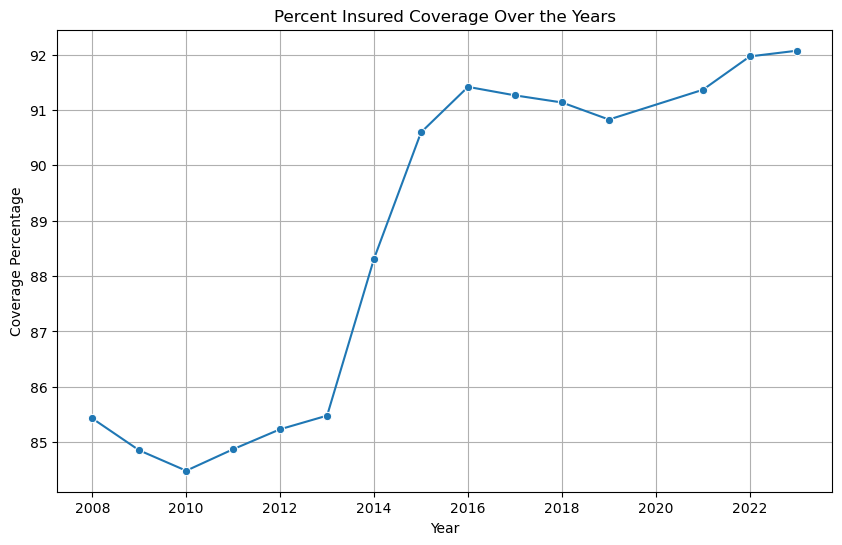

In [54]:
# Calculate the percentage of insured people (Any coverage / Total * 100)
coverage_pivot['Percent Insured'] = (coverage_pivot['Any coverage'] / (coverage_pivot['Uninsured']+coverage_pivot['Any coverage'] ) )* 100

print(coverage_pivot)
# Display the results
#print(coverage_pivot[['Nation', 'Year', 'Percent Insured']].head())

# Save the results to a new CSV file
#coverage_pivot[['Nation', 'Year', 'Percent Insured']].to_csv('percent_insured_by_state_year.csv', index=False)

# Correcting the pivot statement
#heatmap_data = coverage_pivot.pivot(index='Nation', columns='Year', values='Percent Insured')

# Plotting the line chart for "Private" insurance coverage over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=coverage_pivot, x='Year', y='Percent Insured', marker='o')

# Add labels and title
plt.title('Percent Insured Coverage Over the Years')
plt.xlabel('Year')
plt.ylabel('Coverage Percentage')
plt.grid(True)
plt.show()

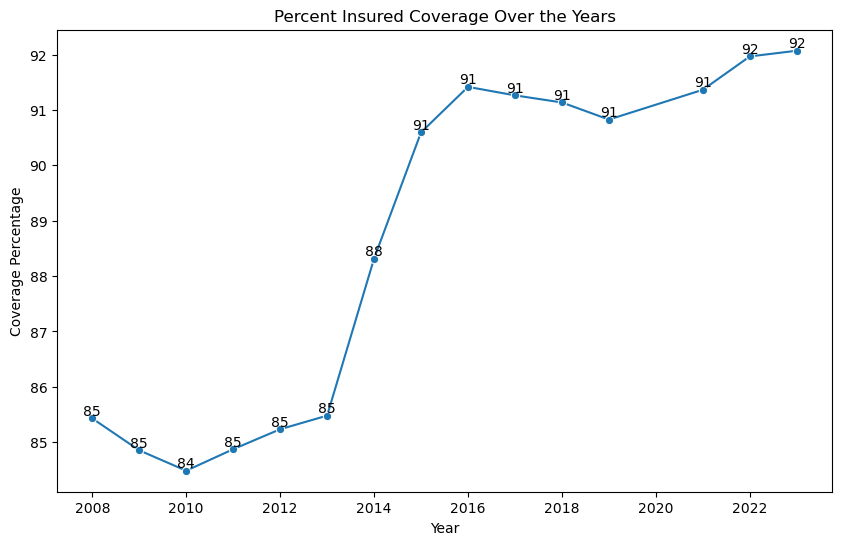

In [55]:
# Plotting the line chart for "Private" insurance coverage over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=coverage_pivot, x='Year', y='Percent Insured', marker='o')

# Add labels and title
plt.title('Percent Insured Coverage Over the Years')
plt.xlabel('Year')
plt.ylabel('Coverage Percentage')

# Format y-axis labels to show 0 decimal places
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}'))

# Remove grid lines
plt.grid(False)

# Add data labels for each point
for x, y in zip(coverage_pivot['Year'], coverage_pivot['Percent Insured']):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom')

plt.show()

In [56]:
## What is the relationship between the number of insured people in each state and the total healthcare expenditure by state for each year from 2011 to 2020?

In [57]:
# Load the cleaned datasets

population_data_df = population_data[(population_data['Year'] >= 2011) & (population_data['Year'] <= 2019)]
population_data_df = population_data_df[['State','Total Health Spending','Year']]

print(population_data_df)

#population_data 
insurance_data_df = insurance_data[(insurance_data['Year'] >= 2011) & (insurance_data['Year'] <= 2019)]
insurance_data_df = insurance_data_df[insurance_data_df['Metric'] == 'estimate'] 

# Filter data to get rows where `Coverage` is "Any coverage" or "Total"
coverage_data = insurance_data_df[insurance_data_df['Coverage'].isin(['Any coverage'])]
coverage_data = coverage_data[['Nation', 'Value', 'Year']]

#print(population_data_df)

print(coverage_data)

# Merge DataFrames on multiple columns
merged_df = pd.merge(
    population_data_df,
    coverage_data,
    left_on=['State', 'Year'],
    right_on=['Nation', 'Year'],
    how='inner'
)

print(merged_df)

             State  Total Health Spending  Year
51         Alabama                42903.0  2019
52          Alaska                 9702.0  2019
53         Arizona                59392.0  2019
54        Arkansas                26744.0  2019
55      California               379715.0  2019
..             ...                    ...   ...
505       Virginia                55019.0  2011
506     Washington                47939.0  2011
507  West Virginia                15242.0  2011
508      Wisconsin                44646.0  2011
509        Wyoming                 4246.0  2011

[459 rows x 3 columns]
              Nation  Value  Year
8977         Alabama   4354  2019
8988          Alaska    620  2019
8999         Arizona   6357  2019
9010        Arkansas   2692  2019
9021      California  36000  2019
...              ...    ...   ...
27435       Virginia   6904  2011
27446     Washington   5764  2011
27457  West Virginia   1554  2011
27468      Wisconsin   5127  2011
27479        Wyoming    47

In [58]:
merged_df

,State,Total Health Spending,Year,Nation,Value
0,Alabama,42903.0,2019,Alabama,4354
1,Alaska,9702.0,2019,Alaska,620
2,Arizona,59392.0,2019,Arizona,6357
3,Arkansas,26744.0,2019,Arkansas,2692
4,California,379715.0,2019,California,36000
...,...,...,...,...,...
454,Virginia,55019.0,2011,Virginia,6904
455,Washington,47939.0,2011,Washington,5764
456,West Virginia,15242.0,2011,West Virginia,1554
457,Wisconsin,44646.0,2011,Wisconsin,5127


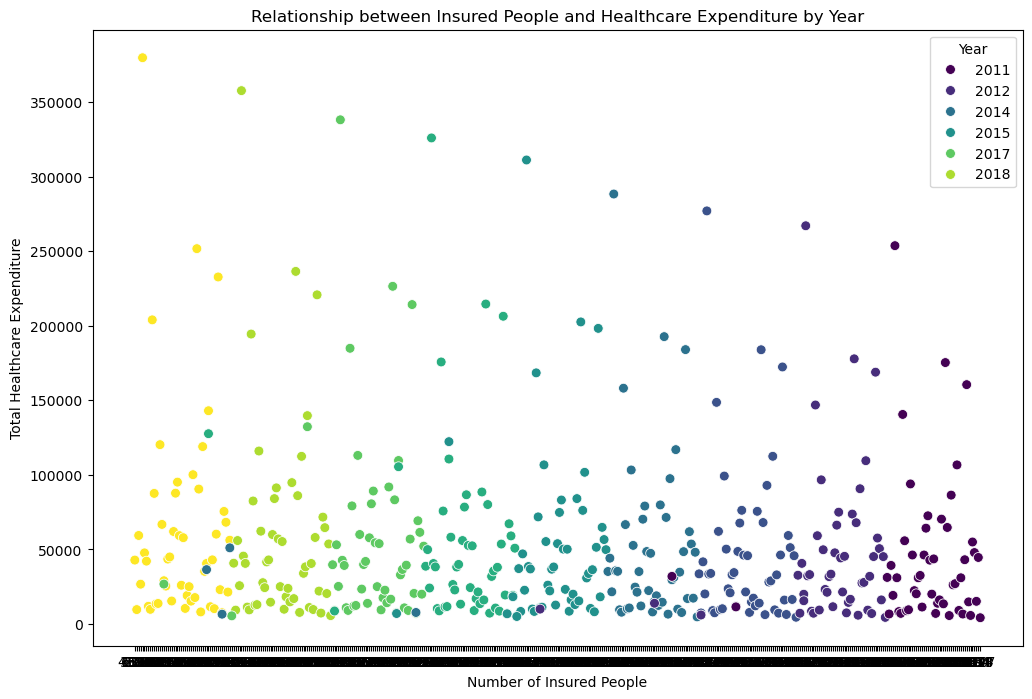

In [59]:
## merged_data: 'Insured People', 'Healthcare Expenditure', 'Year', and 'State'
plt.figure(figsize=(12, 8))
#merged_df['Year'] = merged_df['Year'].astype('category')

sns.scatterplot(data=merged_df, x='Value', y='Total Health Spending', hue='Year', palette='viridis', s=50)
#sns.regplot(data=merged_df, x='Value', y='Total Health Spending', scatter=False, color='gray', line_kws={'linestyle':'--'})
plt.title('Relationship between Insured People and Healthcare Expenditure by Year')
plt.xlabel('Number of Insured People')
plt.ylabel('Total Healthcare Expenditure')
plt.legend(title='Year')
plt.show()

In [60]:
merged_df

,State,Total Health Spending,Year,Nation,Value
0,Alabama,42903.0,2019,Alabama,4354
1,Alaska,9702.0,2019,Alaska,620
2,Arizona,59392.0,2019,Arizona,6357
3,Arkansas,26744.0,2019,Arkansas,2692
4,California,379715.0,2019,California,36000
...,...,...,...,...,...
454,Virginia,55019.0,2011,Virginia,6904
455,Washington,47939.0,2011,Washington,5764
456,West Virginia,15242.0,2011,West Virginia,1554
457,Wisconsin,44646.0,2011,Wisconsin,5127


In [61]:
# Load the cleaned datasets

population_data_df = population_data[(population_data['Year'] >= 2011) & (population_data['Year'] <= 2019)]
population_data_df = population_data_df[['State','Total Health Spending','Year']]


#population_data 
insurance_data_df = insurance_data[(insurance_data['Year'] >= 2011) & (insurance_data['Year'] <= 2019)]
insurance_data_df = insurance_data_df[insurance_data_df['Coverage'] == 'Private'] 
insurance_data_df

# Merge DataFrames on multiple columns
merged_df = pd.merge(
    population_data_df,
    insurance_data_df,
    left_on=['State', 'Year'],
    right_on=['Nation', 'Year'],
    how= 'inner'
)
merged_df

,State,Total Health Spending,Year,Unnamed: 0,Nation,Coverage,Metric,Value
0,Alabama,42903.0,2019,9166,Alabama,Private,estimate,3228
1,Alabama,42903.0,2019,9738,Alabama,Private,MOError1,27
2,Alabama,42903.0,2019,10310,Alabama,Private,Percent,66.9
3,Alabama,42903.0,2019,10882,Alabama,Private,MOError2,0.6
4,Alaska,9702.0,2019,9177,Alaska,Private,estimate,457
...,...,...,...,...,...,...,...,...
1831,Wisconsin,44646.0,2011,29725,Wisconsin,Private,MOError2,0.4
1832,Wyoming,4246.0,2011,28020,Wyoming,Private,estimate,396
1833,Wyoming,4246.0,2011,28592,Wyoming,Private,MOError1,9
1834,Wyoming,4246.0,2011,29164,Wyoming,Private,Percent,70.9


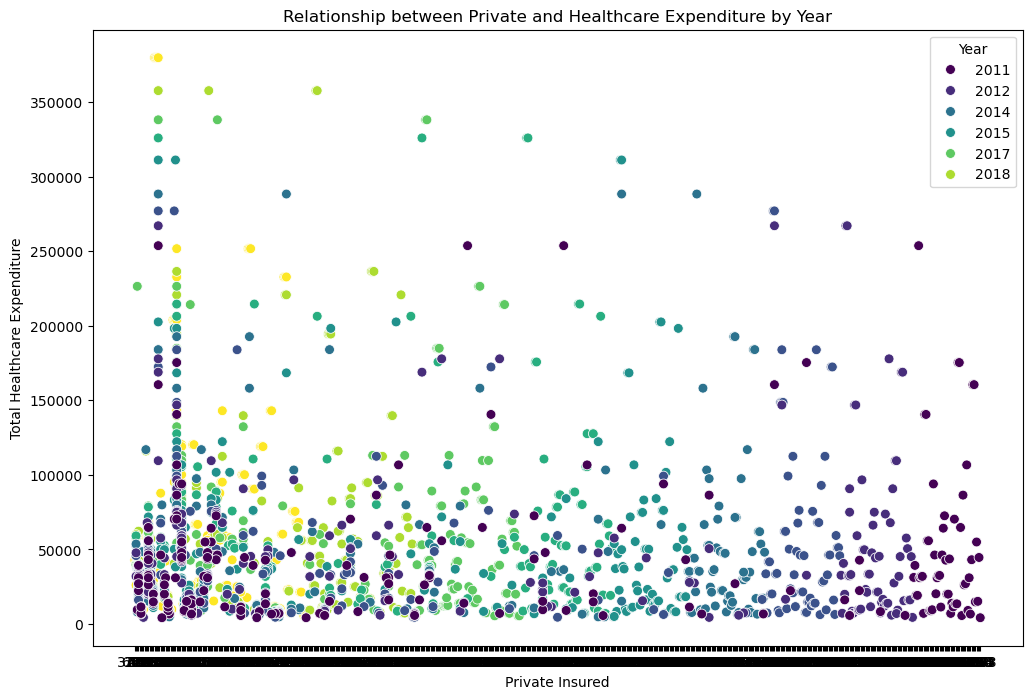

In [62]:
## merged_data: 'Private Insured', 'Healthcare Expenditure', 'Year', and 'State'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_df, x='Value', y='Total Health Spending', hue='Year', palette='viridis', s=50)
#sns.regplot(data=merged_df, x='Value', y='Total Health Spending', scatter=False, color='gray', line_kws={'linestyle':'--'})
plt.title('Relationship between Private and Healthcare Expenditure by Year')
plt.xlabel('Private Insured')
plt.ylabel('Total Healthcare Expenditure')
plt.legend(title='Year')
plt.show()

In [63]:
# Load the cleaned datasets

population_data_df = population_data[(population_data['Year'] >= 2011) & (population_data['Year'] <= 2019)]
population_data_df = population_data_df[['State','Total Health Spending','Year']]

#population_data 
insurance_data_df = insurance_data[(insurance_data['Year'] >= 2011) & (insurance_data['Year'] <= 2019)]
insurance_data_df = insurance_data_df[insurance_data_df['Coverage'] == 'Public'] 
insurance_data_df

# Merge DataFrames on multiple columns
merged_df = pd.merge(
    population_data_df,
    insurance_data_df,
    left_on=['State', 'Year'],
    right_on=['Nation', 'Year'],
    how= 'inner'
)
merged_df

,State,Total Health Spending,Year,Unnamed: 0,Nation,Coverage,Metric,Value
0,Alabama,42903.0,2019,9170,Alabama,Public,estimate,1797
1,Alabama,42903.0,2019,9742,Alabama,Public,MOError1,24
2,Alabama,42903.0,2019,10314,Alabama,Public,Percent,37.3
3,Alabama,42903.0,2019,10886,Alabama,Public,MOError2,0.5
4,Alaska,9702.0,2019,9181,Alaska,Public,estimate,248
...,...,...,...,...,...,...,...,...
1831,Wisconsin,44646.0,2011,29729,Wisconsin,Public,MOError2,0.4
1832,Wyoming,4246.0,2011,28024,Wyoming,Public,estimate,139
1833,Wyoming,4246.0,2011,28596,Wyoming,Public,MOError1,5
1834,Wyoming,4246.0,2011,29168,Wyoming,Public,Percent,24.9


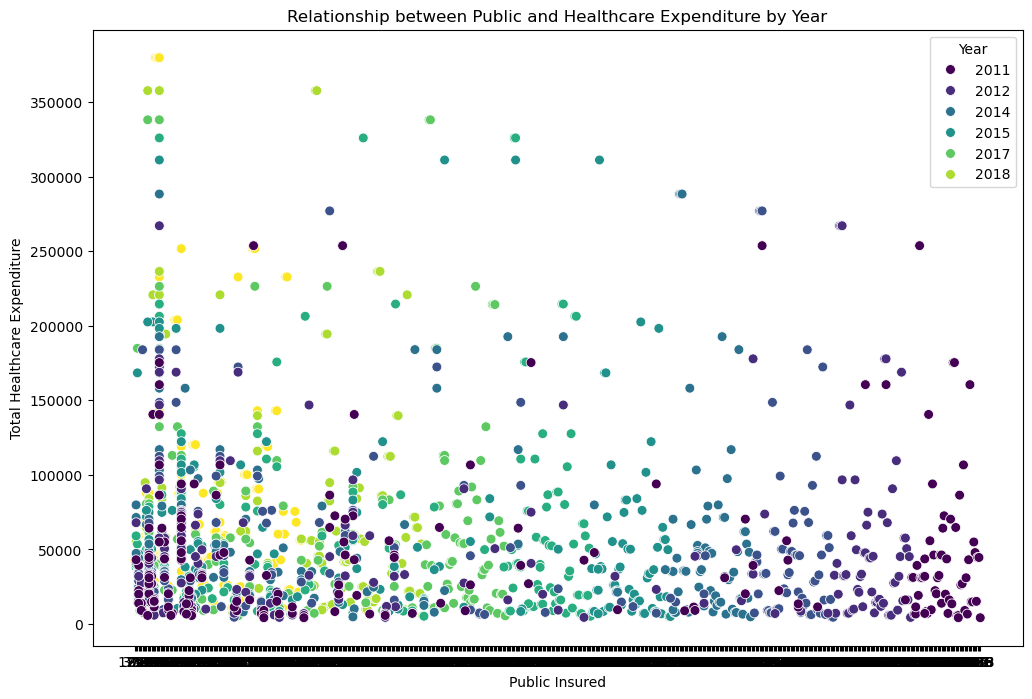

In [64]:
## merged_data: 'Public Insured', 'Healthcare Expenditure', 'Year', and 'State'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_df, x='Value', y='Total Health Spending', hue='Year', palette='viridis', s=50)
#sns.regplot(data=merged_df, x='Value', y='Total Health Spending', scatter=False, color='gray', line_kws={'linestyle':'--'})
plt.title('Relationship between Public and Healthcare Expenditure by Year')
plt.xlabel('Public Insured')
plt.ylabel('Total Healthcare Expenditure')
plt.legend(title='Year')
plt.show()

In [65]:
# Load data
percent_insured_by_state_year = "Data_Files_Healthcare_Project/percent_insured_by_state_year.csv"
percent_insured_by_state_year = pd.read_csv("percent_insured_by_state_year.csv")
state_insured_df = percent_insured_by_state_year[(percent_insured_by_state_year['Year'] >= 2011) & (percent_insured_by_state_year['Year'] <= 2019)]
state_insured_df = state_insured_df[['Nation', 'Year', 'Percent Insured']]
state_insured_df

,Nation,Year,Percent Insured
3,Alabama,2011,85.720339
4,Alabama,2012,86.669479
5,Alabama,2013,86.435331
6,Alabama,2014,87.853996
7,Alabama,2015,89.876595
...,...,...,...
757,Wyoming,2015,88.541667
758,Wyoming,2016,88.388215
759,Wyoming,2017,87.697715
760,Wyoming,2018,89.594356


In [66]:
# Load the cleaned datasets

population_data_df = population_data[(population_data['Year'] >= 2011) & (population_data['Year'] <= 2019)]
population_data_df = population_data_df[['State','Total Health Spending','Year']]

# percentage coverage data
state_insured_df= percent_insured_by_state_year[(percent_insured_by_state_year['Year'] >= 2011) & (percent_insured_by_state_year['Year'] <= 2019)]
state_insured_df= state_insured_df[['Nation', 'Year', 'Percent Insured']]
state_insured_df
# Merge DataFrames on multiple columns
merged_df = pd.merge(
    population_data_df,
    state_insured_df,
    left_on=['State', 'Year'],
    right_on=['Nation', 'Year'],
    how= 'inner'
)
merged_df

,State,Total Health Spending,Year,Nation,Percent Insured
0,Alabama,42903.0,2019,Alabama,90.275762
1,Alaska,9702.0,2019,Alaska,87.818697
2,Arizona,59392.0,2019,Arizona,88.710578
3,Arkansas,26744.0,2019,Arkansas,90.853864
4,California,379715.0,2019,California,92.302959
...,...,...,...,...,...
454,Virginia,55019.0,2011,Virginia,87.536452
455,Washington,47939.0,2011,Washington,85.812119
456,West Virginia,15242.0,2011,West Virginia,85.104053
457,Wisconsin,44646.0,2011,Wisconsin,91.001065


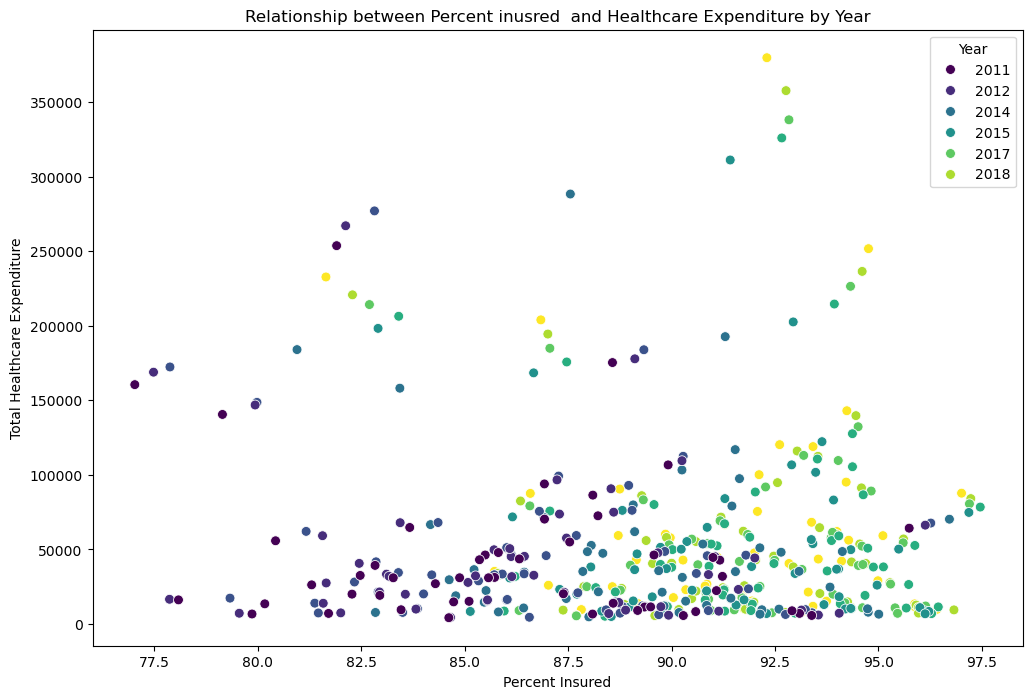

In [67]:
# merged_data: 'Percent Insured ', 'Healthcare Expenditure', 'Year', and 'State'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_df, x='Percent Insured', y='Total Health Spending',hue='Year', palette='viridis', s=50)
#sns.regplot(data=merged_df, x='Value', y='Total Health Spending', scatter=False, color='gray', line_kws={'linestyle':'--'})
plt.title('Relationship between Percent inusred  and Healthcare Expenditure by Year')
plt.xlabel('Percent Insured')
plt.ylabel('Total Healthcare Expenditure')
plt.legend(title='Year')
plt.show()

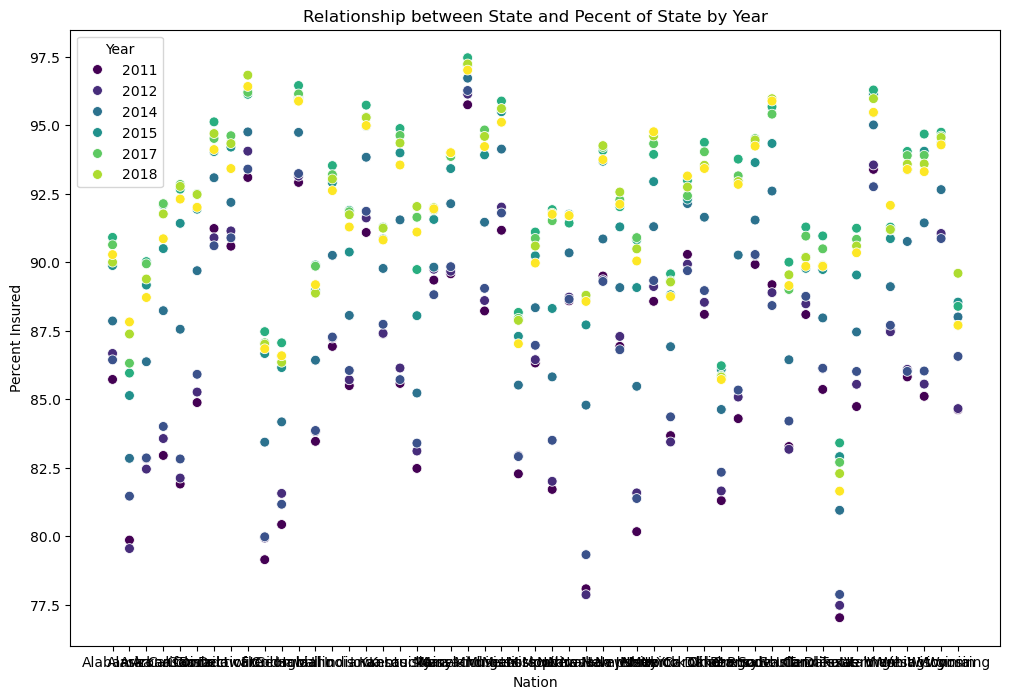

In [68]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data= state_insured_df, x='Nation', y='Percent Insured', hue='Year', palette='viridis', s=50)
#sns.regplot(data=merged_df, x='Value', y='Percent Inusured', scatter=False, color='gray', line_kws={'linestyle':'--'})
plt.title('Relationship between State and Pecent of State by Year')
plt.xlabel('Nation')
plt.ylabel('Percent Insured')
plt.legend(title='Year')
plt.show()

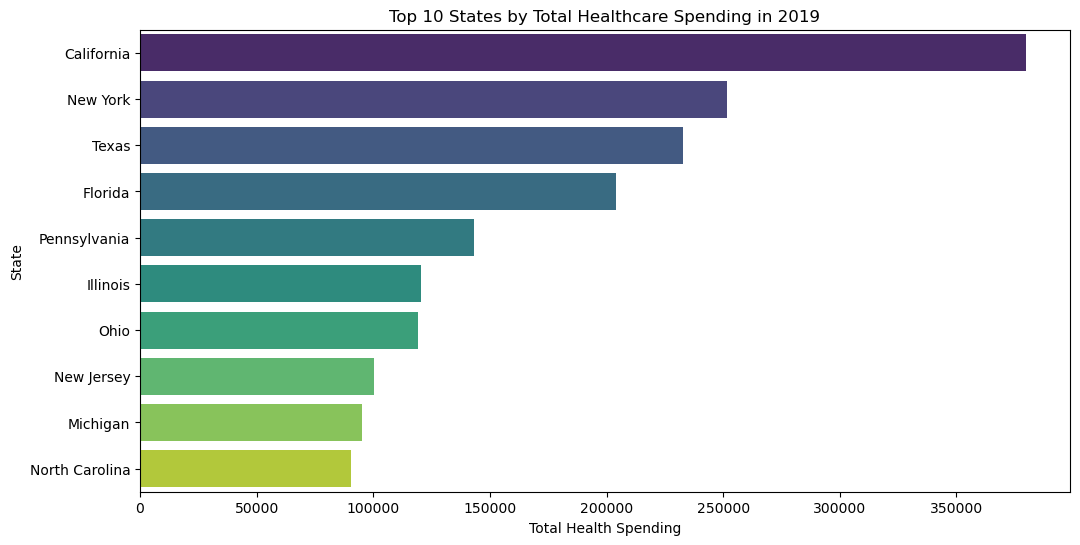

In [69]:
# Filter data for 2019 
spending_2019 = population_data_df[population_data_df['Year'] == 2019] 

# Sort by spending and take top/bottom states 
top_spending = spending_2019.sort_values(by='Total Health Spending', ascending=False).head(10) 

plt.figure(figsize=(12, 6)) 
sns.barplot(data=top_spending, x='Total Health Spending', y='State', palette='viridis') 
plt.title('Top 10 States by Total Healthcare Spending in 2019') 
plt.xlabel('Total Health Spending') 
plt.ylabel('State') 
plt.show()

Coverage  Any coverage  Direct-purchase  Employer-based  Medicaid  Medicare  \
Year                                                                          
2008          260374.5          43955.3        179643.4   46916.2   43741.2   
2009          261126.0          41126.4        174892.0   50530.3   44590.8   
2010          262382.2          40179.4        171375.0   53678.6   45933.4   
2011          265514.6          38928.6        171767.8   55859.9   47240.7   
2012          268552.1          39074.9        172865.2   56996.8   49043.9   

Coverage   Private   Public  TRICARE     Total  Uninsured  VA Care  
Year                                                                
2008      212675.2  83762.0   8140.7  303800.0    45071.3   6631.6  
2009      208134.4  88365.6   8172.3  306683.0    47279.0   6563.7  
2010      205063.1  92897.3   8453.8  309485.0    48850.0   6629.1  
2011      204622.7  95971.7   8709.2  311750.0    47996.2   6854.0  
2012      205863.5  98671.2   88

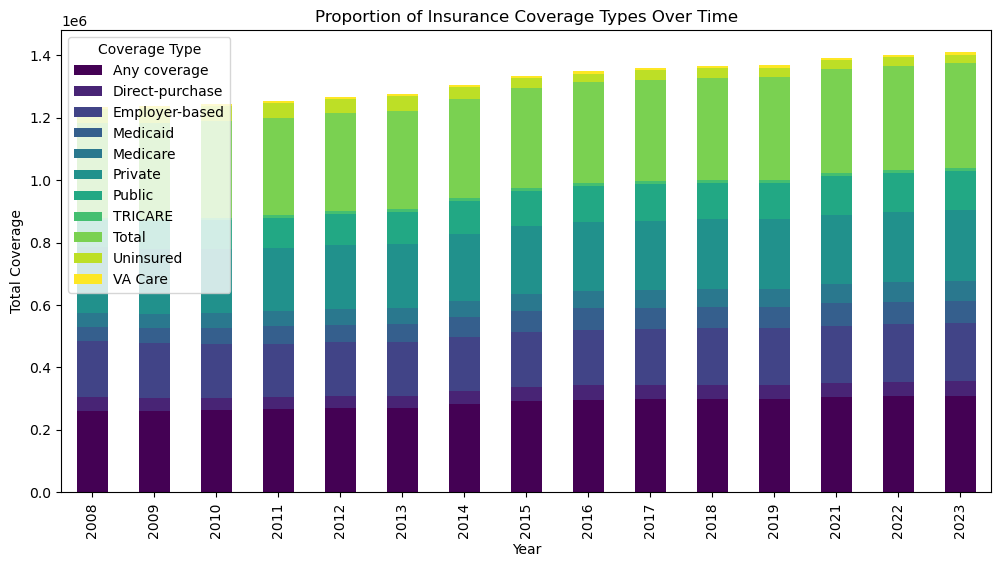

In [70]:
# Stacked Bar Chart: Coverage Types by Year

# Convert 'Value' to string type 
insurance_data['Value'] = insurance_data['Value'].astype(str)
non_numeric_values = insurance_data[~insurance_data['Value'].str.replace(',', '').str.isnumeric()] 
insurance_data['Value'] = pd.to_numeric(insurance_data['Value'].str.replace(',', ''), errors='coerce')
insurance_data['Value'] = insurance_data['Value'].astype(float) 

# Exclude year 2020 from the data 
insurance_data = insurance_data[insurance_data['Year'] != 2020]

# Pivot data for stacking 
stacked_data = insurance_data.pivot_table( 
    index='Year', 
    columns='Coverage', 
    values='Value', 
    aggfunc='sum' 
).fillna(0) 

print(stacked_data.head()) 
print(stacked_data.dtypes) 

# Plot the stacked bar chart 
stacked_data.plot(kind='bar', 
                  stacked=True, 
                  figsize=(12, 6), 
                  colormap='viridis') 
plt.title('Proportion of Insurance Coverage Types Over Time') 
plt.xlabel('Year') 
plt.ylabel('Total Coverage') 
plt.legend(title='Coverage Type') 
plt.show()

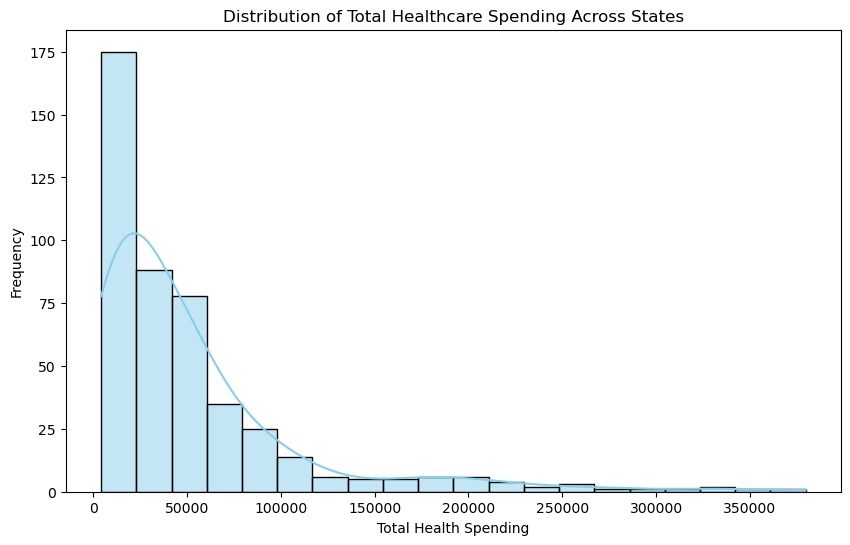

In [71]:
# Distribution of healthcare expenditures across states.
plt.figure(figsize=(10, 6)) 
sns.histplot(population_data_df['Total Health Spending'], bins=20, kde=True, color='skyblue') 
plt.title('Distribution of Total Healthcare Spending Across States') 
plt.xlabel('Total Health Spending') 
plt.ylabel('Frequency') 
plt.show()